In [1]:
ls

datalab/


# INITIAL STEPS

In [2]:
%cd
!git clone https://github.com/tensorflow/models.git

/content
Cloning into 'models'...
remote: Counting objects: 17593, done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 17593 (delta 9), reused 10 (delta 3), pack-reused 17566
Receiving objects: 100% (17593/17593), 470.10 MiB | 36.03 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


In [0]:
%cd ~/models/research/deeplab/datasets
!sh ./download_and_convert_ade20k.sh


In [4]:
%cd ~/models/research/deeplab
%env PYTHONPATH=/env/python/:/content/models/research/:/content/models/research/slim
%env ADE20K_DATASET=/content/models/research/deeplab/datasets/ADE20K/tfrecord

# Export the trained checkpoint.
%env CKPT_PATH=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/train/model.ckpt-500
%env EXPORT_PATH=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/export/frozen_inference_graph.pb

# Set up the working directories.
%env INIT_FOLDER=/content/models/research/deeplab/datasets/ADE20K/init_models
%env TRAIN_LOGDIR=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/train
%env EVAL_LOGDIR=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/eval
%env EXPORT_DIR=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/export
!mkdir -p ${INIT_FOLDER}
!mkdir -p ${TRAIN_LOGDIR}
!mkdir -p ${EVAL_LOGDIR}
!mkdir -p ${EXPORT_DIR}

%env TF_INIT_ROOT=http://download.tensorflow.org/models


/content/models/research/deeplab
env: PYTHONPATH=/env/python/:/content/models/research/:/content/models/research/slim
env: ADE20K_DATASET=/content/models/research/deeplab/datasets/ADE20K/tfrecord
env: CKPT_PATH=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/train/model.ckpt-500
env: EXPORT_PATH=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/export/frozen_inference_graph.pb
env: INIT_FOLDER=/content/models/research/deeplab/datasets/ADE20K/init_models
env: TRAIN_LOGDIR=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/train
env: EVAL_LOGDIR=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/eval
env: EXPORT_DIR=/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/export
env: TF_INIT_ROOT=http://download.tensorflow.org/models


# XCEPTION INITIAL MODEL - OPTION 1

In [6]:
# Copy locally the trained checkpoint as the initial checkpoint.
%cd ~/models/research/deeplab/datasets/ADE20K/init_models
%env TF_INIT_CKPT=deeplabv3_xception_ade20k_train_2018_05_14.tar.gz
!wget -nd -c "${TF_INIT_ROOT}/${TF_INIT_CKPT}"
!tar -xf "${TF_INIT_CKPT}"
%cd ~/models/research/deeplab

print('START train.py')
!python train.py \
  --logtostderr \
  --training_number_of_steps=500 \
  --train_split="train" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --train_crop_size=513 \
  --train_crop_size=513 \
  --train_batch_size=4 \
  --min_resize_value=350 \
  --max_resize_value=500 \
  --resize_factor=16 \
  --fine_tune_batch_norm=True \
  --dataset="ade20k" \
  --initialize_last_layer=True \
  --last_layers_contain_logits_only=False \
  --tf_initial_checkpoint="${INIT_FOLDER}/deeplabv3_xception_ade20k_train/model.ckpt" \
  --train_logdir="${TRAIN_LOGDIR}" \
  --dataset_dir="${ADE20K_DATASET}"


print('START eval.py')
!python eval.py \
  --logtostderr \
  --eval_split="val" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --eval_crop_size=2113 \
  --eval_crop_size=2113 \
  --dataset="ade20k" \
  --checkpoint_dir=${TRAIN_LOGDIR} \
  --eval_logdir=${EVAL_LOGDIR} \
  --dataset_dir=${ADE20K_DATASET} \
  --max_number_of_evaluations=1



print('START export_model.py')
!python export_model.py \
  --logtostderr \
  --checkpoint_path="${CKPT_PATH}" \
  --export_path="${EXPORT_PATH}" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --num_classes=151 \
  --crop_size=513 \
  --crop_size=513 \
  --inference_scales=1.0


/content/models/research/deeplab/datasets/ADE20K/init_models
env: TF_INIT_CKPT=deeplabv3_xception_ade20k_train_2018_05_14.tar.gz
--2018-06-06 07:04:06--  http://download.tensorflow.org/models/deeplabv3_xception_ade20k_train_2018_05_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460420162 (439M) [application/x-tar]
Saving to: ‘deeplabv3_xception_ade20k_train_2018_05_14.tar.gz’

deeplabv3_xception_ 100%[===================>] 439.09M   158MB/s    in 2.8s    

2018-06-06 07:04:09 (158 MB/s) - ‘deeplabv3_xception_ade20k_train_2018_05_14.tar.gz’ saved [460420162/460420162]

/content/models/research/deeplab
START train.py
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is depr

INFO:tensorflow:global step 140: loss = 0.5908 (2.938 sec/step)
INFO:tensorflow:global step 150: loss = 0.6569 (2.940 sec/step)
INFO:tensorflow:global step 160: loss = 0.7966 (2.985 sec/step)
INFO:tensorflow:global step 170: loss = 0.5073 (3.012 sec/step)
INFO:tensorflow:global step 180: loss = 0.7468 (2.983 sec/step)
INFO:tensorflow:global step 190: loss = 0.5928 (2.948 sec/step)
INFO:tensorflow:global_step/sec: 0.328491
INFO:tensorflow:Recording summary at step 199.
INFO:tensorflow:global step 200: loss = 0.6268 (3.004 sec/step)
INFO:tensorflow:global step 210: loss = 0.7161 (2.999 sec/step)
INFO:tensorflow:global step 220: loss = 0.7167 (3.038 sec/step)
INFO:tensorflow:global step 230: loss = 0.5391 (2.946 sec/step)
INFO:tensorflow:global step 240: loss = 0.8033 (2.972 sec/step)
INFO:tensorflow:global step 250: loss = 0.7699 (2.987 sec/step)
INFO:tensorflow:global step 260: loss = 0.5010 (2.979 sec/step)
INFO:tensorflow:global step 270: loss = 0.5934 (2.963 sec/step)
INFO:tensorflow

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting evaluation at 2018-06-06-07:30:29
INFO:tensorflow:Evaluation [200/2000]
INFO:tensorflow:Evaluation [400/2000]
INFO:tensorflow:Evaluation [600/2000]
INFO:tensorflow:Evaluation [800/2000]
INFO:tensorflow:Evaluation [1000/2000]
INFO:tensorflow:Evaluation [1200/2000]
INFO:tensorflow:Evaluation [1400/2000]
INFO:tensorflow:Evaluation [1600/2000]
INFO:tensorflow:Evaluation [1800/2000]
INFO:tensorflow:Evaluation [2000/2000]
INFO:tensorflow:Finished evaluation at 2018-06-06-08:57:45
miou_1.0[0.290280968]
START export_model.py
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:Prepare to export model to: /content/models/resea

# MOBILE INITIAL MODEL - OPTION 2

In [5]:
# Copy locally the trained checkpoint as the initial checkpoint.
%cd ~/models/research/deeplab/datasets/ADE20K/init_models
%env TF_INIT_CKPT=deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
!wget -nd -c "${TF_INIT_ROOT}/${TF_INIT_CKPT}"
!tar -xf "${TF_INIT_CKPT}"
%cd ~/models/research/deeplab

print('START train.py')
!python train.py \
  --logtostderr \
  --training_number_of_steps=2000 \
  --train_split="train" \
  --model_variant="mobilenet_v2" \
  --train_crop_size=513 \
  --train_crop_size=513 \
  --train_batch_size=2 \
  --min_resize_value=350 \
  --max_resize_value=500 \
  --resize_factor=16 \
  --fine_tune_batch_norm=False \
  --dataset="ade20k" \
  --initialize_last_layer=False \
  --last_layers_contain_logits_only=True \
  --tf_initial_checkpoint="${INIT_FOLDER}/deeplabv3_mnv2_pascal_train_aug/model.ckpt-30000" \
  --train_logdir="${TRAIN_LOGDIR}" \
  --dataset_dir="${ADE20K_DATASET}"


#print('START eval.py')
#!python eval.py \
#    --logtostderr \
#    --eval_split="val" \
#    --model_variant="mobilenet_v2" \
#    --eval_crop_size=2113 \
#    --eval_crop_size=2113 \
#    --dataset="ade20k" \
#    --checkpoint_dir=${TRAIN_LOGDIR} \
#    --eval_logdir=${EVAL_LOGDIR} \
#    --dataset_dir=${ADE20K_DATASET}


print('START export_model.py')
!python export_model.py \
  --logtostderr \
  --checkpoint_path="${CKPT_PATH}" \
  --export_path="${EXPORT_PATH}" \
  --model_variant="mobilenet_v2" \
  --num_classes=150 \
  --crop_size=513 \
  --crop_size=513 \
  --inference_scales=1.0

/content/models/research/deeplab/datasets/ADE20K/init_models
env: TF_INIT_CKPT=deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
--2018-05-14 10:33:07--  http://download.tensorflow.org/models/deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.31.128, 2607:f8b0:400c:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.31.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23882985 (23M) [application/x-tar]
Saving to: ‘deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz’

deeplabv3_mnv2_pasc 100%[===================>]  22.78M  97.4MB/s    in 0.2s    

2018-05-14 10:33:08 (97.4 MB/s) - ‘deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz’ saved [23882985/23882985]

/content/models/research/deeplab
START train.py
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecate

INFO:tensorflow:global step 170: loss = 3.0631 (0.395 sec/step)
INFO:tensorflow:global step 180: loss = 3.0630 (0.422 sec/step)
INFO:tensorflow:global step 190: loss = 3.3553 (0.392 sec/step)
INFO:tensorflow:global step 200: loss = 2.1573 (0.413 sec/step)
INFO:tensorflow:global step 210: loss = 3.5129 (0.415 sec/step)
INFO:tensorflow:global step 220: loss = 3.4223 (0.428 sec/step)
INFO:tensorflow:global step 230: loss = 3.9884 (0.417 sec/step)
INFO:tensorflow:global step 240: loss = 3.4751 (0.432 sec/step)
INFO:tensorflow:global step 250: loss = 3.9566 (0.407 sec/step)
INFO:tensorflow:global step 260: loss = 2.9084 (0.389 sec/step)
INFO:tensorflow:global step 270: loss = 3.8223 (0.406 sec/step)
INFO:tensorflow:global step 280: loss = 2.5351 (0.401 sec/step)
INFO:tensorflow:global step 290: loss = 2.8596 (0.425 sec/step)
INFO:tensorflow:global step 300: loss = 2.7678 (0.385 sec/step)
INFO:tensorflow:global step 310: loss = 3.4301 (0.421 sec/step)
INFO:tensorflow:global step 320: loss = 

INFO:tensorflow:global step 720: loss = 1.4321 (0.426 sec/step)
INFO:tensorflow:global step 730: loss = 3.8332 (0.390 sec/step)
INFO:tensorflow:global step 740: loss = 1.9928 (0.399 sec/step)
INFO:tensorflow:global step 750: loss = 2.0375 (0.394 sec/step)
INFO:tensorflow:global step 760: loss = 2.6145 (0.389 sec/step)
INFO:tensorflow:global step 770: loss = 1.7290 (0.405 sec/step)
INFO:tensorflow:global step 780: loss = 1.5036 (0.409 sec/step)
INFO:tensorflow:global step 790: loss = 3.3745 (0.400 sec/step)
INFO:tensorflow:global step 800: loss = 2.1893 (0.393 sec/step)
INFO:tensorflow:global step 810: loss = 1.3956 (0.413 sec/step)
INFO:tensorflow:global step 820: loss = 1.6457 (0.380 sec/step)
INFO:tensorflow:global step 830: loss = 3.1278 (0.415 sec/step)
INFO:tensorflow:global step 840: loss = 3.4762 (0.439 sec/step)
INFO:tensorflow:global step 850: loss = 2.6576 (0.416 sec/step)
INFO:tensorflow:global step 860: loss = 2.5527 (0.404 sec/step)
INFO:tensorflow:global step 870: loss = 

INFO:tensorflow:global step 1270: loss = 2.2663 (0.394 sec/step)
INFO:tensorflow:global step 1280: loss = 2.2008 (0.446 sec/step)
INFO:tensorflow:global step 1290: loss = 1.3892 (0.391 sec/step)
INFO:tensorflow:global step 1300: loss = 1.8860 (0.401 sec/step)
INFO:tensorflow:global step 1310: loss = 2.5318 (0.427 sec/step)
INFO:tensorflow:global step 1320: loss = 1.4166 (0.396 sec/step)
INFO:tensorflow:global step 1330: loss = 2.8293 (0.403 sec/step)
INFO:tensorflow:global step 1340: loss = 3.1576 (0.413 sec/step)
INFO:tensorflow:global step 1350: loss = 1.8098 (0.399 sec/step)
INFO:tensorflow:global step 1360: loss = 3.4417 (0.423 sec/step)
INFO:tensorflow:global step 1370: loss = 2.5543 (0.411 sec/step)
INFO:tensorflow:global step 1380: loss = 2.3660 (0.386 sec/step)
INFO:tensorflow:global step 1390: loss = 1.3109 (0.389 sec/step)
INFO:tensorflow:global step 1400: loss = 2.6782 (0.388 sec/step)
INFO:tensorflow:global step 1410: loss = 2.2202 (0.423 sec/step)
INFO:tensorflow:global st

INFO:tensorflow:global step 1810: loss = 1.7093 (0.390 sec/step)
INFO:tensorflow:global step 1820: loss = 3.7113 (0.385 sec/step)
INFO:tensorflow:global step 1830: loss = 1.8811 (0.396 sec/step)
INFO:tensorflow:global step 1840: loss = 2.0107 (0.389 sec/step)
INFO:tensorflow:global step 1850: loss = 2.9687 (0.388 sec/step)
INFO:tensorflow:global step 1860: loss = 1.9324 (0.388 sec/step)
INFO:tensorflow:global step 1870: loss = 2.3203 (0.384 sec/step)
INFO:tensorflow:global step 1880: loss = 3.8277 (0.391 sec/step)
INFO:tensorflow:global step 1890: loss = 0.9400 (0.419 sec/step)
INFO:tensorflow:global step 1900: loss = 1.7711 (0.416 sec/step)
INFO:tensorflow:global step 1910: loss = 1.7748 (0.405 sec/step)
INFO:tensorflow:global step 1920: loss = 1.3568 (0.386 sec/step)
INFO:tensorflow:global step 1930: loss = 1.5234 (0.415 sec/step)
INFO:tensorflow:global step 1940: loss = 4.2553 (0.391 sec/step)
INFO:tensorflow:global step 1950: loss = 1.0534 (0.387 sec/step)
INFO:tensorflow:global st

2018-05-14 10:47:25.864760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:911] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-05-14 10:47:25.864818: I tensorflow/core/common_runtime/gpu/gpu_device.cc:917]      0 
2018-05-14 10:47:25.864850: I tensorflow/core/common_runtime/gpu/gpu_device.cc:930] 0:   N 
2018-05-14 10:47:25.865219: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1041] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10765 MB memory) -> physical GPU (device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7)
INFO:tensorflow:Restoring parameters from /content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/train/model.ckpt-2000
INFO:tensorflow:Froze 272 variables.
Converted 272 variables to const ops.


# Prediction steps

In [8]:
%cd

import tarfile
with tarfile.open('deeplab_model.tar.gz', 'w:gz') as tar:
  tar.add('/content/models/research/deeplab/datasets/ADE20K/exp/train_on_trainval_set/export/frozen_inference_graph.pb', arcname="frozen_inference_graph.pb")

/content


In [0]:
#@title Imports

import os
import StringIO
import tarfile
import tempfile
import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf

In [0]:
#@title Helper methods


class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph'

  def __init__(self, tarball_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    # Extract frozen graph from tar archive.
    tar_file = tarfile.open(tarball_path)
    for tar_info in tar_file.getmembers():
      if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
        file_handle = tar_file.extractfile(tar_info)
        graph_def = tf.GraphDef.FromString(file_handle.read())
        break

    tar_file.close()

    if graph_def is None:
      raise RuntimeError('Cannot find inference graph in tar archive.')

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')

    self.sess = tf.Session(graph=self.graph)

  def run(self, image):
    """Runs inference on a single image.

    Args:
      image: A PIL.Image object, raw input image.

    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    width, height = image.size
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    return resized_image, seg_map


def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.

  Returns:
    A Colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  return colormap


def label_to_color_image(label):
  """Adds color defined by the dataset colormap to the label.

  Args:
    label: A 2D array with integer type, storing the segmentation label.

  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the PASCAL color map.

  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label')

  colormap = create_pascal_label_colormap()

  if np.max(label) >= len(colormap):
    raise ValueError('label value too large.')

  return colormap[label]


def vis_segmentation(image, seg_map):
  """Visualizes input image, segmentation map and overlay view."""
  plt.figure(figsize=(15, 5))
  grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

  plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  plt.title('input image')

  plt.subplot(grid_spec[1])
  seg_image = label_to_color_image(seg_map).astype(np.uint8)
  plt.imshow(seg_image)
  plt.axis('off')
  plt.title('segmentation map')

  plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(seg_image, alpha=0.7)
  plt.axis('off')
  plt.title('segmentation overlay')

  unique_labels = np.unique(seg_map)
  ax = plt.subplot(grid_spec[3])
  plt.imshow(
      FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
  ax.yaxis.tick_right()
  plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
  plt.xticks([], [])
  ax.tick_params(width=0.0)
  plt.grid('off')
  plt.show()


LABEL_NAMES = np.asarray([
  'background','wall','building, edifice','sky','floor, flooring','tree','ceiling','road, route','bed ','windowpane, window ','grass','cabinet','sidewalk, pavement','person, individual, someone, somebody, mortal, soul','earth, ground','door, double door','table','mountain, mount','plant, flora, plant life','curtain, drape, drapery, mantle, pall','chair','car, auto, automobile, machine, motorcar','water','painting, picture','sofa, couch, lounge','shelf','house','sea','mirror','rug, carpet, carpeting','field','armchair','seat','fence, fencing','desk','rock, stone','wardrobe, closet, press','lamp','bathtub, bathing tub, bath, tub','railing, rail','cushion','base, pedestal, stand','box','column, pillar','signboard, sign','chest of drawers, chest, bureau, dresser','counter','sand','sink','skyscraper','fireplace, hearth, open fireplace','refrigerator, icebox','grandstand, covered stand','path','stairs, steps','runway','case, display case, showcase, vitrine','pool table, billiard table, snooker table','pillow','screen door, screen','stairway, staircase','river','bridge, span','bookcase','blind, screen','coffee table, cocktail table','toilet, can, commode, crapper, pot, potty, stool, throne','flower','book','hill','bench','countertop','stove, kitchen stove, range, kitchen range, cooking stove','palm, palm tree','kitchen island','computer, computing machine, computing device, data processor, electronic computer, information processing system','swivel chair','boat','bar','arcade machine','hovel, hut, hutch, shack, shanty','bus, autobus, coach, charabanc, double-decker, jitney, motorbus, motorcoach, omnibus, passenger vehicle','towel','light, light source','truck, motortruck','tower','chandelier, pendant, pendent','awning, sunshade, sunblind','streetlight, street lamp','booth, cubicle, stall, kiosk','television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box','airplane, aeroplane, plane','dirt track','apparel, wearing apparel, dress, clothes','pole','land, ground, soil','bannister, banister, balustrade, balusters, handrail','escalator, moving staircase, moving stairway','ottoman, pouf, pouffe, puff, hassock','bottle','buffet, counter, sideboard','poster, posting, placard, notice, bill, card','stage','van','ship','fountain','conveyer belt, conveyor belt, conveyer, conveyor, transporter','canopy','washer, automatic washer, washing machine','plaything, toy','swimming pool, swimming bath, natatorium','stool','barrel, cask','basket, handbasket','waterfall, falls','tent, collapsible shelter','bag','minibike, motorbike','cradle','oven','ball','food, solid food','step, stair','tank, storage tank','trade name, brand name, brand, marque','microwave, microwave oven','pot, flowerpot','animal, animate being, beast, brute, creature, fauna','bicycle, bike, wheel, cycle ','lake','dishwasher, dish washer, dishwashing machine','screen, silver screen, projection screen','blanket, cover','sculpture','hood, exhaust hood','sconce','vase','traffic light, traffic signal, stoplight','tray','ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin','fan','pier, wharf, wharfage, dock','crt screen','plate','monitor, monitoring device','bulletin board, notice board','shower','radiator','glass, drinking glass','clock','flag'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

In [11]:
_TARBALL_NAME = 'deeplab_model.tar.gz'

MODEL = DeepLabModel(_TARBALL_NAME)
print 'model loaded successfully!'

model loaded successfully!


Saving bici_aper.jpg to bici_aper.jpg
saved file bici_aper.jpg
running deeplab on image img.jpg...


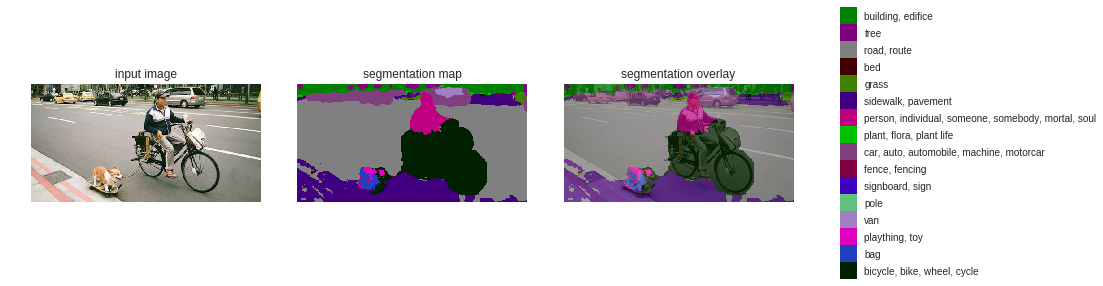

In [12]:
from google.colab import files
from os import path

file_name = 'img.jpg'
uploaded = files.upload()
  
for name, data in uploaded.items():
  with open(file_name, 'wb') as f:
    f.write(data)
    f.close()
    print('saved file ' + name)

orignal_im = Image.open(name)

print 'running deeplab on image %s...' % file_name
resized_im, seg_map = MODEL.run(orignal_im)
vis_segmentation(resized_im, seg_map)
